In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('desafio_indicium_imdb.csv')
pd.set_option('display.max_columns', None)

# Limpeza de dados

In [3]:
# Observar tabela
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [4]:
# Analisar número de linhas e colunas
df.shape

(999, 16)

In [5]:
# Analisar informações gerais a respeito dos tipos de dados das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


## Checar existência de valores nulos

No caso de presença de valores nulos, analisar de existe a necessidade de eliminar linhas

In [6]:
df.isnull().values.any()

True

Há valores nulos no dataframe.

In [7]:
# Analisar quantidade de valores nulos e em quais colunas se fazem presentes
df.isnull().sum()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [8]:
#dropar valores nulos
df.dropna(axis=0, inplace=True)

## Checar existência de valores duplicados

Caso se façam presentes, excluir do dataframe valores repetidos

In [9]:
# checar dados duplicados
dup_data = df.duplicated().any()
print(dup_data)

False


## Checar valores associados à coluna "Released_Year"

In [10]:
anos = df['Released_Year'].unique()

anos

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2019',
       '2014', '1998', '1997', '1995', '1991', '1977', '1954', '2011',
       '2006', '2000', '1988', '1985', '1968', '1960', '1942', '1936',
       '1931', '2018', '2016', '2017', '2012', '2009', '1981', '1979',
       '1964', '2004', '1992', '1987', '1986', '1984', '1983', '1976',
       '1973', '1971', '1965', '1962', '1959', '1958', '1952', '1944',
       '1941', '2013', '2007', '2005', '1989', '1963', '1950', '1948',
       '2015', '1996', '1982', '1978', '1967', '1951', '1949', '1940',
       '1939', '1934', '1970', '1969', '1961', '1946', '1930', '1938',
       '1933', 'PG', '1953'], dtype=object)

In [11]:
# Identificado valor estranho denominado "PG"

# Ver quantas variáveis estão associadas a esse valor
df_PG = df[df['Released_Year'] == 'PG']
print(len(df_PG))

1


In [12]:
df_PG

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [13]:
# Corrigir para o ano correto do filme
df.loc[df['Released_Year'] == 'PG', 'Released_Year'] = 1995

## Verificar colunas

In [14]:
# Excluir coluna Unnamed: 0
df = df.drop(columns=['Unnamed: 0'])

In [15]:
df.dtypes

Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [16]:
# Mudar os tipos de algumas colunas
df['Runtime'] = df['Runtime'].str.replace(' min', '')
df['Gross'] = df['Gross'].str.replace(',', '').astype('float64')
df = df.astype({'Runtime': 'int64','Gross': 'float64'})

# Análise Exploratória de Dados

In [17]:
df.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,713.000000,713.000000,713.000000,7.130000e+02,7.130000e+02
mean,123.690042,7.935203,77.154278,3.533480e+05,7.858395e+07
std,25.896632,0.288999,12.409392,3.462212e+05,1.150433e+08
min,72.000000,7.600000,28.000000,2.522900e+04,1.305000e+03
25%,104.000000,7.700000,70.000000,9.582600e+04,6.153939e+06
50%,120.000000,7.900000,78.000000,2.363110e+05,3.500000e+07
75%,136.000000,8.100000,86.000000,5.059180e+05,1.025158e+08
max,238.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


In [18]:
# Sorting data

df = df.sort_values(by=['Gross'], ascending=False)

In [19]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
476,Star Wars: Episode VII - The Force Awakens,2015,U,138,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0
58,Avengers: Endgame,2019,UA,181,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.0
622,Avatar,2009,UA,162,"Action, Adventure, Fantasy",7.8,A paraplegic Marine dispatched to the moon Pan...,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625.0
59,Avengers: Infinity War,2018,UA,149,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482.0
651,Titanic,1997,UA,194,"Drama, Romance",7.8,A seventeen-year-old aristocrat falls in love ...,75.0,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,1046089,659325379.0


In [20]:
# Detalhes sobre a coluna de faturamento
df[['Gross']].describe()

,Gross
count,7.130000e+02
mean,7.858395e+07
std,1.150433e+08
min,1.305000e+03
25%,6.153939e+06
50%,3.500000e+07
75%,1.025158e+08
max,9.366622e+08


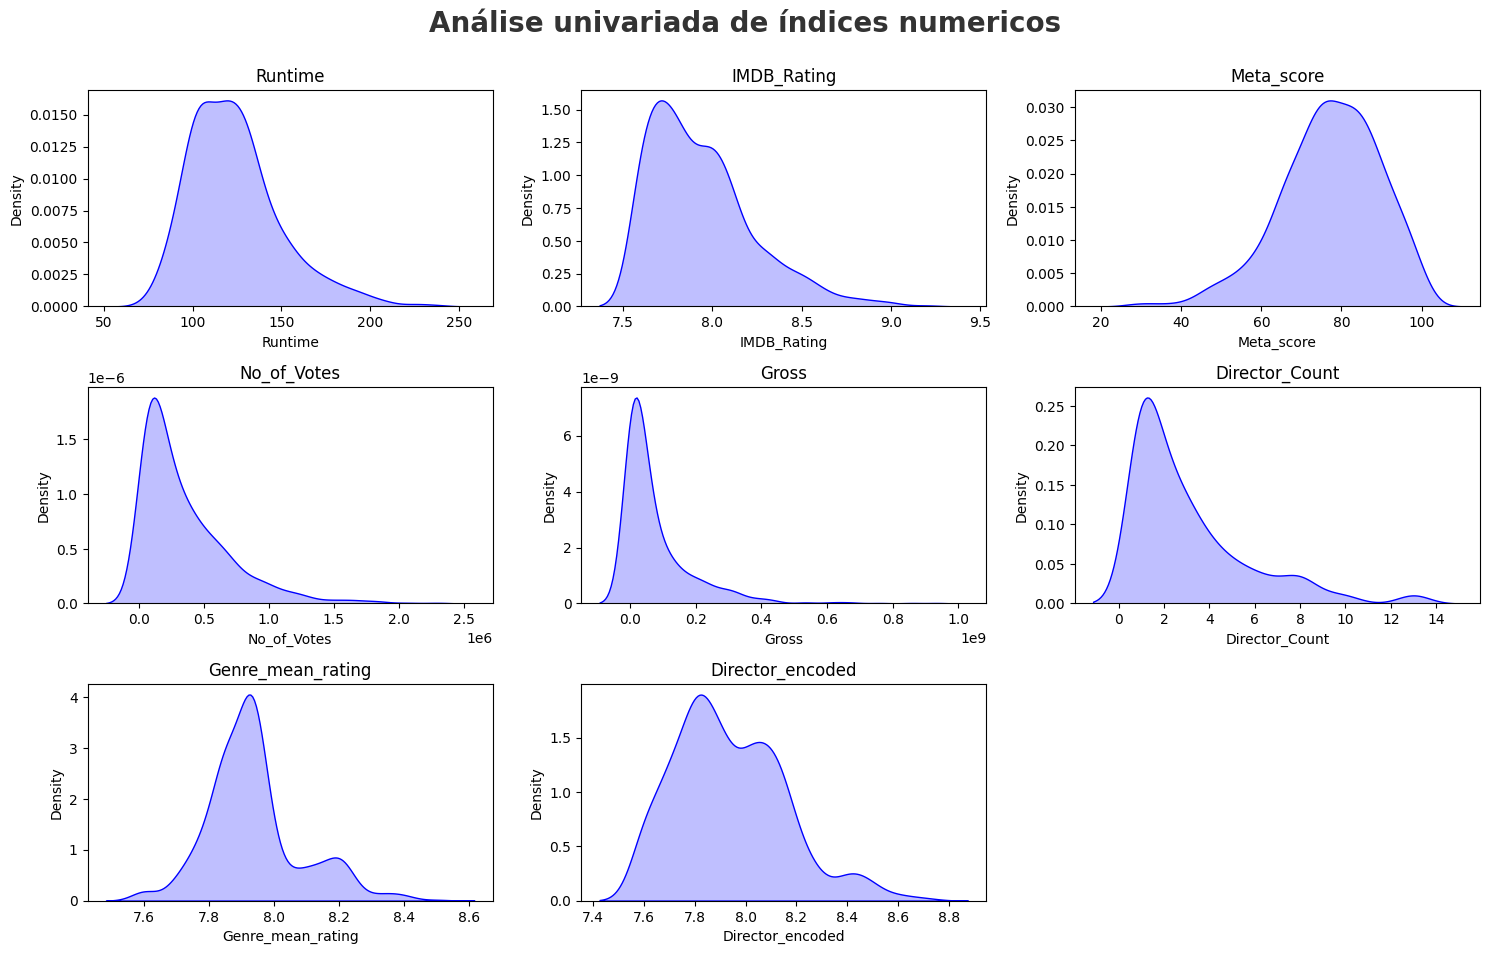

In [74]:
# Definir a lista de colunas numéricas
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(15,15))
plt.suptitle('Análise univariada de índices numericos',fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numeric_features[i]], fill=True, color='b')
    plt.title(numeric_features[i])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [75]:
# identificar correlações entre variáveis numéricas
df[numeric_features].corr()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Director_Count,Genre_mean_rating,Director_encoded
Runtime,1.000000,0.257640,-0.005948,0.212927,0.169380,0.172828,0.221682,0.290585
IMDB_Rating,0.257640,1.000000,0.283745,0.609239,0.130857,0.230823,0.495445,0.750262
Meta_score,-0.005948,0.283745,1.000000,0.028578,-0.014663,0.149624,0.171682,0.233649
No_of_Votes,0.212927,0.609239,0.028578,1.000000,0.560955,0.327516,0.262951,0.453850
Gross,0.169380,0.130857,-0.014663,0.560955,1.000000,0.122158,0.041207,0.139742
Director_Count,0.172828,0.230823,0.149624,0.327516,0.122158,1.000000,0.141891,0.307657
Genre_mean_rating,0.221682,0.495445,0.171682,0.262951,0.041207,0.141891,1.000000,0.410964
Director_encoded,0.290585,0.750262,0.233649,0.453850,0.139742,0.307657,0.410964,1.000000


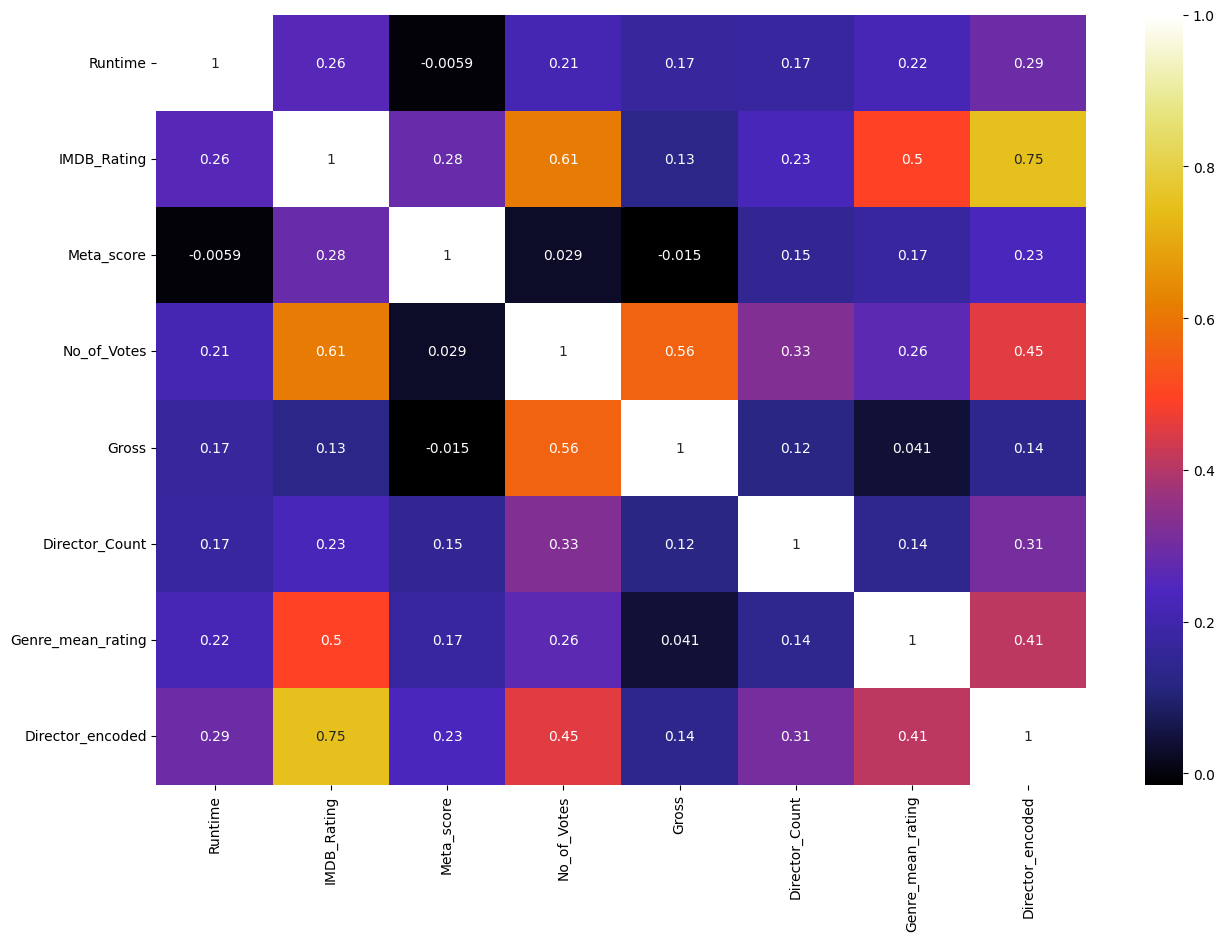

In [76]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# gerar o heatmap de correlação
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), cmap='CMRmap', annot=True)
plt.show()

In [ ]:
o que podemos extrair do heatmap:
- IMDB_Rating e No_of_Votes apresentam uma alta correlação positiva, o que significa que filmes com filmes com notas altas no IMDB tendem a ter mais votos na plataforma
- No_of_Votes e Gross também apresentam uma significamente correlação, o que significa que filmes com mais faturamentos tendem a ser mais avaliados pelo público (como esperado)

### **O que podemos extrair do heatmap:**
- "*IMDB_Rating*" e "*No_of_Votes*" apresentam uma alta correlação positiva, o que significa que filmes com filmes com notas altas no IMDB tendem a ter mais votos na plataforma.
- "*No_of_Votes*" e "*Gross*" também apresentam uma significamente correlação, o que significa que filmes com mais faturamentos tendem a ser mais avaliados pelo público (como esperado).

Como estamos querendo analisar como as variáveis influenciam no sucesso de um filme, faremos gráficos de dispersão (scatter plots) para visualizar a correlação entre variáveis contínuas e a variável alvo (que nesse caso utilizaremos o faturamento).

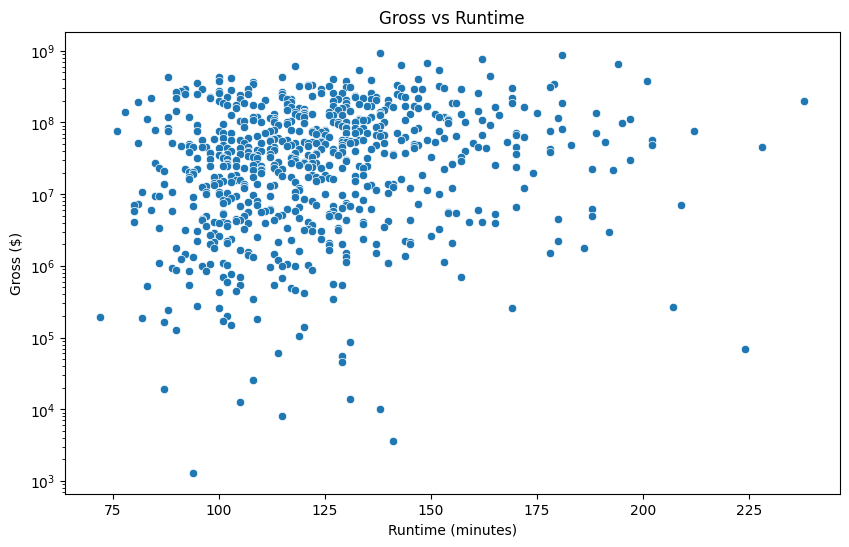

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runtime', y='Gross', data=df)
plt.title('Gross vs Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Gross ($)')

# ajuste nos pontos no eixo y
plt.yticks([0.5e8, 1e8, 1.5e8, 2e8, 2.5e8], ['0.5', '1', '1.5', '2', '2.5'])

# aplicando escala logarítmica ao eixo y
plt.yscale('log')

plt.show()

**É possível observar como a maioria dos filmes parecem estar concentrados antes dos 150 minutos, mas não é possível enxergar uma relação clara entre as 2 variáveis.**

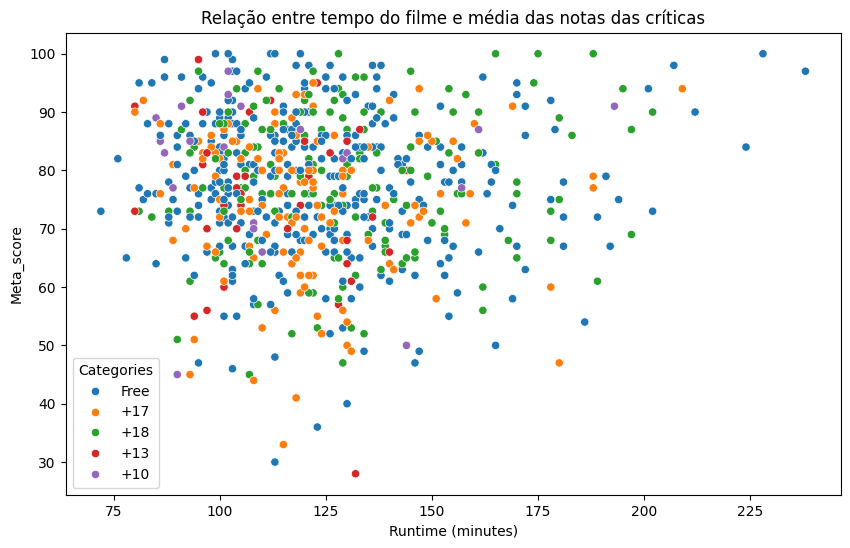

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runtime', y='Meta_score', hue='Category', data=df)
plt.title('Relação entre tempo do filme e média das notas das críticas')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Meta_score')
plt.legend(title='Categories')
plt.show()

## Classificação Indicativa

In [21]:
#Analisar valores da variável categórica
df.Certificate.unique()

array(['U', 'UA', 'R', 'A', 'G', 'PG-13', 'PG', 'Passed', 'U/A',
       'Approved', 'GP', 'TV-PG'], dtype=object)

Agrupar os valores de "Certificate" em novas classificações para ajudar na análise da seguinte maneira:

- U, UA, U/A e G, Approved e Passed: classficados como "free";
- PG, GP e TV-PG: classificados como "+10";
- PG-13: classificado como "+13";
- R: Classificado como "+17";
- A: Classificado como "+18".

In [22]:
# Dicionário com novos valores
rating_map = {
    'U': 'Free',
    'UA': 'Free',
    'G': 'Free',
    'U/A': 'Free',
    'Passed': 'Free',
    'Approved': 'Free',
    'PG': '+10',
    'GP': '+10',
    'TV-PG': '+10',
    'PG-13': '+13',
    'R': '+17',
    'A': '+18',
}

# Nova coluna 'Category' usando o dicionário com os novos valores
df['Category'] = df['Certificate'].map(rating_map)

<Figure size 2000x1500 with 0 Axes>

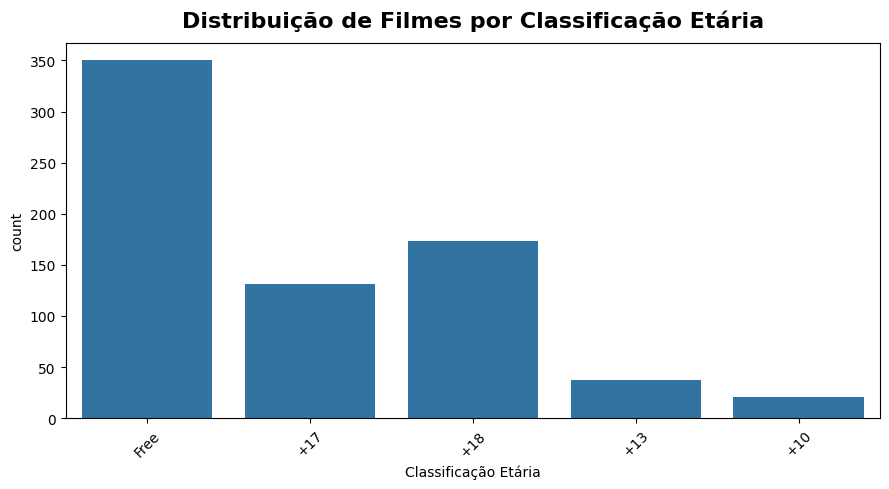

In [23]:
import warnings
warnings.filterwarnings('ignore')

##categorical features
plt.figure(figsize=(20,15))
plt.suptitle('Distribuição de Filmes por Classificação Etária',fontsize=20,fontweight='bold',alpha=0.8,y=1.)
cat1= ['Category']

plt.figure(figsize=(9, 5))
sns.countplot(x='Category', data=df)
plt.title('Distribuição de Filmes por Classificação Etária', fontsize=16, fontweight='bold', y=1.02)
plt.xlabel('Classificação Etária')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Calcular a média de faturamento por faixa etária
media_fatur_faixa = df.groupby('Category')['Gross'].mean().reset_index()
media_fatur_faixa = media_fatur_faixa.sort_values('Gross', ascending=False)

media_fatur_faixa = media_fatur_faixa.rename(columns={'Category': 'Faixa Etária'})
media_fatur_faixa = media_fatur_faixa.rename(columns={'Gross': 'Faturamento'})

media_fatur_faixa = media_fatur_faixa.set_index('Faixa Etária')

media_fatur_faixa

,Faturamento
Faixa Etária,
Free,1.122026e+08
+18,6.625398e+07
+13,3.780400e+07
+17,2.653840e+07
+10,1.830602e+07


In [25]:
# Calcular a média do IMDB por faixa etária
media_imdb_faixa = df.groupby('Category')['IMDB_Rating'].mean().reset_index()
media_imdb_faixa = media_imdb_faixa.sort_values('IMDB_Rating', ascending=False)

media_imdb_faixa = media_imdb_faixa.rename(columns={'Category': 'Faixa Etária'})
media_imdb_faixa = media_imdb_faixa.rename(columns={'IMDB_Rating': 'Média do IMDB'})

# Adicionando a coluna "No_of_Votes"
media_imdb_faixa['No_of_Votes'] = df.groupby('Category')['No_of_Votes'].mean().reset_index(drop=True)


media_imdb_faixa = media_imdb_faixa.set_index('Faixa Etária')

# tabela com média do imdb e média do número de votos por faixa etária
media_imdb_faixa

,Média do IMDB,No_of_Votes
Faixa Etária,,
+18,7.993642,461325.549133
Free,7.950857,381649.134286
+10,7.895238,118607.857143
+17,7.866412,230302.763359
+13,7.784211,155005.526316


In [26]:
# média do meta_score por faixa etária
media_critica_faixa = df.groupby('Category')['Meta_score'].mean().reset_index()
media_critica_faixa = media_critica_faixa.sort_values('Meta_score', ascending=False)

media_critica_faixa = media_critica_faixa.rename(columns={'Category': 'Faixa Etária'})
media_critica_faixa = media_critica_faixa.rename(columns={'Meta_score': 'Média da Crítica'})

media_critica_faixa = media_critica_faixa.set_index('Faixa Etária')

media_critica_faixa

,Média da Crítica
Faixa Etária,
+10,80.190476
+18,78.000000
Free,77.842857
+13,75.000000
+17,74.335878


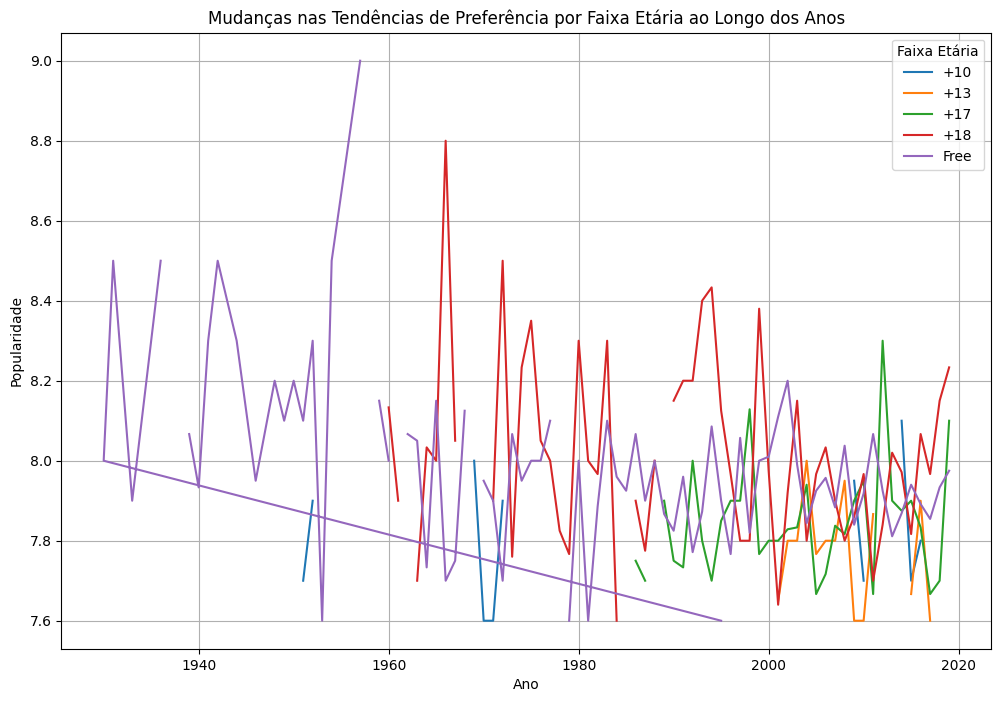

In [71]:
tendencias_por_faixa_etaria = df.groupby(['Released_Year', 'Category'])['IMDB_Rating'].mean().unstack()

# Plotando o gráfico de linha
plt.figure(figsize=(12, 8))
for faixa_etaria in tendencias_por_faixa_etaria.columns:
    plt.plot(tendencias_por_faixa_etaria.index, tendencias_por_faixa_etaria[faixa_etaria], label=faixa_etaria)

plt.title('Mudanças nas Tendências de Preferência por Faixa Etária ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Popularidade')
plt.legend(title='Faixa Etária')
plt.grid(True)
plt.show()

### **Hipóteses e Questões**

#### **Houve mudanças nas tendências de preferência por faixa etária ao longo dos anos?**
- Não houve mudanças significativas nas preferências do público ao longo dos anos. No entanto, observa-se uma leve queda na popularidade dos filmes classificados como +18, especialmente comparada com os filmes dos anos 60 até os anos 2000. O banco de dados não contém informações suficientes sobre filmes com classificações indicativas anteriores aos anos 60 que não sejam livres, portanto, não é possível fazer inferências baseadas nesse período. No entanto, é possível notar uma ligeira preferência por filmes de classificação indicativa +18 entre os anos 2000 e 2020, período em que há uma variedade maior classificações indicativas.

#### **Filmes de classificação adulta (+10) apresentam a maior média de arrecadação?**
- Filmes de classificação indicativa livre apresentam uma média de arrecadação maior, no entanto, filmes com classificação +18 apresentam a média do IMDB ligeiramente maior do que filmes de classificação livre. Além disso, filmes de classificação +10 possuem uma média da crítica maior que as duas classificações citadas anteriormente.

## Gênero

In [27]:
df_genre = df.copy()

#df_genre['Genre'] = df['Genre'].str.split(',')
df_genre['Genre'] = df_genre['Genre'].apply(lambda x: [genre.strip() for genre in x.split(',')])


df_genre = df_genre.explode('Genre')

In [28]:
#conferindo dataframe explodido
df_genre.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Category
476,Star Wars: Episode VII - The Force Awakens,2015,U,138,Action,7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0,Free
476,Star Wars: Episode VII - The Force Awakens,2015,U,138,Adventure,7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0,Free
476,Star Wars: Episode VII - The Force Awakens,2015,U,138,Sci-Fi,7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0,Free
58,Avengers: Endgame,2019,UA,181,Action,8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.0,Free
58,Avengers: Endgame,2019,UA,181,Adventure,8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.0,Free


In [29]:
generos_contagem = df_genre['Genre'].value_counts()

# Tabela com a contagem dos gêneros
tabela_generos = generos_contagem.reset_index()
tabela_generos.columns = ['Genre', 'Count']

# Os 10 gêneros mais presentes
tabela_generos[:10]

,Genre,Count
0,Drama,499
1,Adventure,163
2,Comedy,161
3,Crime,142
4,Action,140
5,Thriller,99
6,Romance,88
7,Biography,88
8,Mystery,70
9,Animation,63


In [30]:
print(f'Quantidade de gêneros presentes no dataset: {len(generos_contagem)}')

Quantidade de gêneros presentes no dataset: 21


In [31]:
# média de notas por gênero
media_fatur_genero = df_genre.groupby('Genre')['Gross'].mean().reset_index()
media_fatur_genero = media_fatur_genero.sort_values('Gross', ascending=False)

# renomeando o nome da coluna
media_fatur_genero = media_fatur_genero.rename(columns={'Genre': 'Gênero'})
media_fatur_genero = media_fatur_genero.rename(columns={'Gross': 'Média de Faturamento'})

media_fatur_genero = media_fatur_genero.set_index('Gênero')
media_fatur_genero[:15]
# tabela ordenada em relação ao faturamento

,Média de Faturamento
Gênero,
Adventure,1.718926e+08
Sci-Fi,1.611225e+08
Action,1.566213e+08
Animation,1.359713e+08
Fantasy,1.105749e+08
Family,1.034671e+08
Comedy,7.521764e+07
Thriller,6.494065e+07
History,6.218803e+07


In [32]:
# média de notas por gênero
media_imdb_genero = df_genre.groupby('Genre')['IMDB_Rating'].mean().reset_index()
media_imdb_genero = media_imdb_genero.sort_values('IMDB_Rating', ascending=False)

# renomeando o nome da coluna
media_imdb_genero = media_imdb_genero.rename(columns={'Genre': 'Gênero'})
media_imdb_genero = media_imdb_genero.rename(columns={'IMDB_Rating': 'Média IMDB'})


media_imdb_genero = media_imdb_genero.set_index('Gênero')
# 10 gêneros com maior média imdb
media_imdb_genero[:10]

,Média IMDB
Gênero,
Film-Noir,8.050000
Western,8.037500
War,8.006897
Sci-Fi,7.991071
Adventure,7.963190
Mystery,7.947143
Crime,7.942958
Drama,7.938677
Action,7.937143


In [33]:
genre_counts = df_genre.groupby(['Category', 'Genre']).size().reset_index(name='Count')
most_associated_genres = genre_counts.loc[genre_counts.groupby('Category')['Count'].idxmax()]
most_associated_genres.sort_values('Count', ascending=False)

,Category,Genre,Count
78,Free,Drama,210
57,+18,Drama,126
40,+17,Drama,118
21,+13,Drama,31
6,+10,Drama,14


**Em todas as classificações etárias, o gênero "Drama" é o mais presente nos filmes de cada classificação**

In [34]:
# Calcular a diferença entre IMDb Rating e Meta Score
df_genre['Rating_Diff'] = (df_genre['IMDB_Rating'] * 10) - df_genre['Meta_score']

# Agrupar por gênero e calcular a média das diferenças
genre_diff = df_genre.groupby('Genre')['Rating_Diff'].mean().reset_index()

# Ordenar os gêneros pela menor diferença
sorted_genre_diff = genre_diff.sort_values('Rating_Diff', key=abs)
sorted_genre_diff[:10]

,Genre,Rating_Diff
19,War,0.655172
20,Western,-0.687500
10,History,1.157895
4,Comedy,1.298137
7,Family,1.534884
15,Romance,-1.568182
11,Horror,1.722222
1,Adventure,1.748466
12,Music,1.962963
6,Drama,2.210421


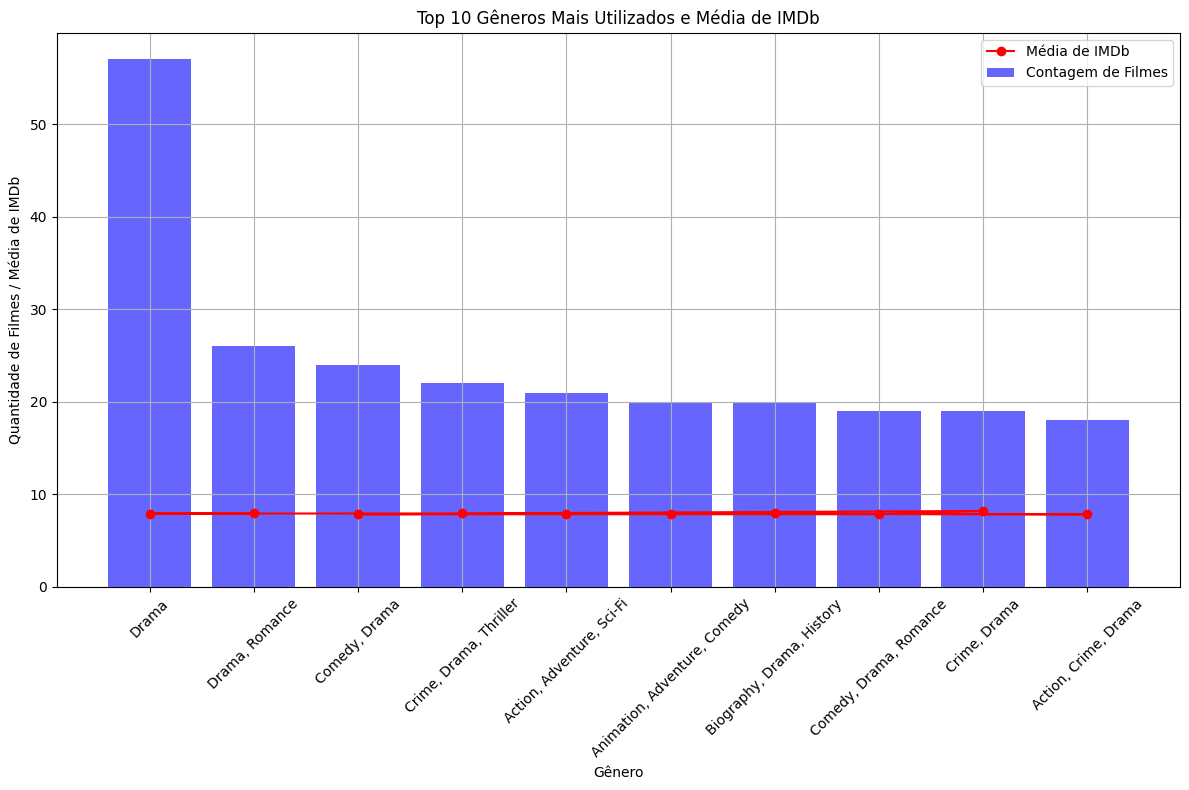

In [73]:
# calcular a média de imdb por gênero
media_imdb_por_genero = df.groupby('Genre')['IMDB_Rating'].mean().reset_index()

# contar quantas vezes cada gênero aparece
contagem_generos = df['Genre'].value_counts().reset_index()
contagem_generos.columns = ['Gênero', 'Contagem']

# filtrar os 10 gêneros mais utilizados
top_10_generos = contagem_generos.head(10)['Gênero']
df_top_10 = df[df['Genre'].isin(top_10_generos)]

# calcular a média de imdb por gênero
media_imdb_por_genero_top_10 = df_top_10.groupby('Genre')['IMDB_Rating'].mean().reset_index()

contagem_generos_top_10 = df_top_10['Genre'].value_counts().reset_index()
contagem_generos_top_10.columns = ['Gênero', 'Contagem']


plt.figure(figsize=(12, 8))
plt.bar(contagem_generos_top_10['Gênero'], contagem_generos_top_10['Contagem'], color='b', alpha=0.6, label='Contagem de Filmes')
plt.plot(media_imdb_por_genero_top_10['Genre'], media_imdb_por_genero_top_10['IMDB_Rating'], marker='o', color='r', label='Média de IMDb')

plt.title('Top 10 Gêneros Mais Utilizados e Média de IMDb')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Filmes / Média de IMDb')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

### **Hipóteses e Questões**

#### **O gênero drama é o mais presente entre os filmes. É possível que o drama também seja o gênero com maior média de arrecadação?**
- Não, na verdade os gêneros com maiores arrecadações são: Aventura, Sci-Fi, Ação,	Animação e Fantasia.

#### **Quais os gêneros com as melhores notas no IMDB?**
- Film-Noir, Velho-Oeste,	Guerra, Sci-Fi e Aventura.

#### **Quais gêneros possuem as menores diferenças entre a média do IMDb e o Meta Score?**
- Guerra, Velho-Oeste, História, Comédia, Família, Romance, Horror, Aventura, Musical e Drama.

## Diretores

In [35]:
# Olhar os 10 diretores com maior faturamento
df.groupby('Director')[['Gross']].sum().sort_values('Gross', ascending=False)[:10]

,Gross
Director,
Steven Spielberg,2.478133e+09
Anthony Russo,2.205039e+09
Christopher Nolan,1.937454e+09
James Cameron,1.748237e+09
Peter Jackson,1.597312e+09
J.J. Abrams,1.423171e+09
Brad Bird,1.099628e+09
Robert Zemeckis,1.049446e+09
David Yates,9.789537e+08


In [36]:
# Olhar os 10 diretores com maior faturamento
df.groupby('Director')[['IMDB_Rating']].mean().sort_values('IMDB_Rating', ascending=False)[:10]

,IMDB_Rating
Director,
Lana Wachowski,8.7
Irvin Kershner,8.7
George Lucas,8.6
Frank Darabont,8.6
Roberto Benigni,8.6
Fernando Meirelles,8.6
Milos Forman,8.5
Olivier Nakache,8.5
Charles Chaplin,8.5


In [37]:
# Olhar os 10 diretores com maior faturamento
df.groupby('Director')[['Meta_score']].mean().sort_values('Meta_score', ascending=False)[:10]

,Meta_score
Director,
Ingmar Bergman,100.0
Orson Welles,99.5
Michael Curtiz,98.5
Guillermo del Toro,98.0
Joseph L. Mankiewicz,98.0
Charles Chaplin,97.5
Sam Peckinpah,97.0
Akira Kurosawa,97.0
Carol Reed,97.0


In [38]:
# Olhar os 10 diretores com maior faturamento
df_directors = df.groupby('Director')[['No_of_Votes']].sum().sort_values('No_of_Votes', ascending=False)[:10]
df_directors

,No_of_Votes
Director,
Christopher Nolan,11578345
Quentin Tarantino,8123208
Steven Spielberg,7817166
David Fincher,6607859
Martin Scorsese,6513530
Peter Jackson,6148579
James Cameron,4613107
Ridley Scott,4339890
Robert Zemeckis,4055464


In [70]:
# Receita bruta total por diretor por ano
# Ordenada em ordem decrescente em relação ao faturamento

df.groupby(['Director', 'Released_Year'])[['Gross']].sum().sort_values('Gross', ascending=False)[:15]

,,Gross
Director,Released_Year,
J.J. Abrams,2015,936662225.0
Anthony Russo,2019,858373000.0
James Cameron,2009,760507625.0
Anthony Russo,2018,678815482.0
James Cameron,1997,659325379.0
Joss Whedon,2012,623279547.0
Brad Bird,2018,608581744.0
Christopher Nolan,2008,534858444.0
Gareth Edwards,2016,532177324.0


In [39]:
import plotly.express as px

# Calcular o número de filmes por diretor
director_counts = df['Director'].value_counts()
df['Director_Count'] = df['Director'].map(director_counts)

# Criar o gráfico interativo com Plotly Express
fig = px.scatter(df, x='No_of_Votes', y='IMDB_Rating', size='Director_Count',
                 hover_name='Series_Title', color='Director',
                 title='IMDb Rating vs Number of Votes by Director Popularity',
                 labels={'No_of_Votes': 'Number of Votes', 'IMDB_Rating': 'IMDB Rating'},
                 size_max=50)

fig.show()

## Atores

In [40]:
# Criando uma lista de todas as colunas de estrelas
colunas_estrelas = ['Star1', 'Star2', 'Star3', 'Star4']

# Unindo todas as colunas de estrelas em uma série usando o método stack
atores = df[colunas_estrelas].stack().reset_index(drop=True)

# Contando a quantidade de vezes que cada ator aparece
contagem_atores = atores.value_counts().reset_index()
contagem_atores.columns = ['Nome do Ator', 'Filmes Estrelados']

# Calculando a média de IMDb por ator
media_imdb_por_ator = df.groupby(atores).agg({'IMDB_Rating': 'mean'}).reset_index()
media_imdb_por_ator.columns = ['Nome do Ator', 'Média IMDb']

# Unindo as contagens de filmes estrelados com a média de IMDb por ator
contagem_atores_com_imdb = pd.merge(contagem_atores, media_imdb_por_ator, on='Nome do Ator', how='left')

# Exibindo a tabela com as 10 primeiras entradas
contagem_atores_com_imdb.head(10)

,Nome do Ator,Filmes Estrelados,Média IMDb
0,Robert De Niro,16,7.933333
1,Tom Hanks,14,8.055556
2,Al Pacino,13,7.675000
3,Brad Pitt,12,7.833333
4,Clint Eastwood,11,7.725000
5,Matt Damon,11,7.933333
6,Christian Bale,11,8.033333
7,Leonardo DiCaprio,11,8.057143
8,Scarlett Johansson,9,8.500000
9,Ethan Hawke,9,7.700000


In [41]:
# Criando uma lista de todas as colunas de estrelas
colunas_estrelas = ['Star1', 'Star2', 'Star3', 'Star4']

# Unindo todas as colunas de estrelas em uma série usando o método stack
atores = df[colunas_estrelas].stack().reset_index(drop=True)

# Contando a quantidade de vezes que cada ator aparece
contagem_atores = atores.value_counts().reset_index()
contagem_atores.columns = ['Nome do Ator', 'Filmes Estrelados']

# Calculando a média de IMDb por ator
media_imdb_por_ator = df.groupby(atores).agg({'IMDB_Rating': 'mean'}).reset_index()
media_imdb_por_ator.columns = ['Nome do Ator', 'Média IMDb']

# Unindo as contagens de filmes estrelados com a média de IMDb por ator
contagem_atores_com_imdb = pd.merge(contagem_atores, media_imdb_por_ator, on='Nome do Ator', how='left')

# Exibindo a tabela com as 10 primeiras entradas
contagem_atores_com_imdb.head(10)

,Nome do Ator,Filmes Estrelados,Média IMDb
0,Robert De Niro,16,7.933333
1,Tom Hanks,14,8.055556
2,Al Pacino,13,7.675000
3,Brad Pitt,12,7.833333
4,Clint Eastwood,11,7.725000
5,Matt Damon,11,7.933333
6,Christian Bale,11,8.033333
7,Leonardo DiCaprio,11,8.057143
8,Scarlett Johansson,9,8.500000
9,Ethan Hawke,9,7.700000


In [69]:
# Criando uma lista de todas as colunas de estrelas
colunas_estrelas = ['Star1', 'Star2', 'Star3', 'Star4']

# Unindo todas as colunas de estrelas em uma série usando o método stack
atores = df[colunas_estrelas].stack().reset_index(drop=True)

# Contando a quantidade de vezes que cada ator aparece
contagem_atores = atores.value_counts().reset_index()
contagem_atores.columns = ['Nome do Ator', 'Filmes Estrelados']

# Calculando a média de IMDb por ator
media_imdb_por_ator = df.groupby(atores).agg({'IMDB_Rating': 'mean'}).reset_index()
media_imdb_por_ator.columns = ['Nome do Ator', 'Média IMDb']

# Unindo as contagens de filmes estrelados com a média de IMDb por ator
contagem_atores_com_imdb = pd.merge(contagem_atores, media_imdb_por_ator, on='Nome do Ator', how='left')
contagem_atores_com_imdb_ordenado = contagem_atores_com_imdb.sort_values(by='Média IMDb', ascending=False)

# Exibindo a tabela com as 10 primeiras entradas
contagem_atores_com_imdb_ordenado.head(10)

,Nome do Ator,Filmes Estrelados,Média IMDb
553,Daisy Ridley,1,9.200000
385,Oscar Isaac,2,9.000000
1590,John Boyega,1,9.000000
77,Joe Russo,4,8.800000
384,Sam Worthington,2,8.800000
1416,Michelle Rodriguez,1,8.800000
191,Chris Hemsworth,3,8.700000
40,Chris Evans,6,8.633333
1414,Sarah Vowell,1,8.600000
1412,Aaron Eckhart,1,8.600000


In [67]:
# Criando uma lista de todas as colunas de estrelas
colunas_estrelas = ['Star1', 'Star2', 'Star3', 'Star4']

# Unindo todas as colunas de estrelas em uma série usando o método stack
atores = df[colunas_estrelas].stack().reset_index(drop=True)

# Contando a quantidade de vezes que cada ator aparece
contagem_atores = atores.value_counts().reset_index()
contagem_atores.columns = ['Nome do Ator', 'Filmes Estrelados']


media_votos_por_ator = df.groupby(atores).agg({'No_of_Votes': 'mean'}).reset_index()
media_votos_por_ator.columns = ['Nome do Ator', 'Média de Votos por Filme']


contagem_atores_com_votos = pd.merge(contagem_atores, media_votos_por_ator, on='Nome do Ator', how='left')
contagem_atores_com_votos_ordenado = contagem_atores_com_votos.sort_values(by='Média de Votos por Filme', ascending=False)
# Exibindo a tabela com as 10 primeiras entradas
contagem_atores_com_votos_ordenado.head(10)

,Nome do Ator,Filmes Estrelados,Média de Votos por Filme
1590,John Boyega,1,2.303232e+06
384,Sam Worthington,2,1.854740e+06
553,Daisy Ridley,1,1.620367e+06
77,Joe Russo,4,1.564156e+06
1400,Jeff Goldblum,1,1.516346e+06
1414,Sarah Vowell,1,1.445096e+06
1413,Huck Milner,1,1.270197e+06
1439,Rich Moore,1,1.267869e+06
33,Mark Ruffalo,6,1.219656e+06
20,Robert Downey Jr.,7,1.197858e+06


### **Hipótese: existe uma correlação entre a popularidade de um ator e o número médio de votos recebidos pelos filmes em que ele atua?**
- Resposta: Não necessariamente, atores associados à maiores médias de nota no IMDB e média de número de votos não se encontram entre os mais populares (levando em consideração filmes estrelados) do banco de dados.

## Analise multivariada

## Feature Engineering

In [52]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [53]:
# dropando variáveis que não utilizar para prever
#df.drop('Series_Title', axis = 1, inplace = True)
##df.drop('Certificate', axis=1, inplace=True)
#df.drop('Overview', axis=1, inplace=True)
#df.drop('Star1', axis=1, inplace=True)
#df.drop('Star2', axis=1, inplace=True)
##df.drop('Star3', axis=1, inplace=True)
#df.drop('Star4', axis=1, inplace=True)

In [54]:
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = df.groupby('Genre')['IMDB_Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['IMDB_Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

In [55]:
# Keeping the predictor and target variable

X = df[[ 'Released_Year', 'Runtime','Meta_score','No_of_Votes', 'Gross','Genre_mean_rating','Director_encoded']]
y = df['IMDB_Rating']

In [56]:
# Splitting the dataset into training and testing parts

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Model Building

In [57]:
# Building machine learning model and training them
Model = LinearRegression()
Model.fit(X_train,y_train)
Model_pred = Model.predict(X_test)

In [58]:
# Evaluating the performance of model with evaluation metrics

print('The performance evaluation of Logistic Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, Model_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, Model_pred))
print('R2 score: ',r2_score(y_test, Model_pred))

The performance evaluation of Logistic Regression is below:  

Mean squared error:  0.0206422924638365
Mean absolute error:  0.10534005729563548
R2 score:  0.7652051181482965


In [59]:
X.head(5)

,Released_Year,Runtime,Meta_score,No_of_Votes,Gross,Genre_mean_rating,Director_encoded
476,2015,138,80.0,860823,936662225.0,7.928571,7.833333
58,2019,181,78.0,809955,858373000.0,8.225000,8.075000
622,2009,162,83.0,1118998,760507625.0,8.200000,8.080000
59,2018,149,68.0,834477,678815482.0,7.928571,8.075000
651,1997,194,75.0,1046089,659325379.0,7.938462,8.080000


In [60]:
y.head(5)

476    7.9
58     8.4
622    7.8
59     8.4
651    7.8
Name: IMDB_Rating, dtype: float64

## Questões do desafio

#### **1. Qual filme você recomendaria para uma pessoa que você não conhece?**
Como seria importante saber os interesses cinematográficos do indivíduo, em uma situação mais geral seria ideal identificar o filme com a melhor avaliação de acordo com a nota no IMDB que tenha uma classificação indicativa mais geral, nesse caso, a livre. Assim, indicaria "The Dark Knight", por ser um filme com classificação livre com melhor avaliação no IMDB, e também por ser de um ano considerado mais recente.



In [82]:
filmes_free = df[df['Category'] == 'Free']

top_5_filmes_free = filmes_free.sort_values(by='IMDB_Rating', ascending=False).head(5)

top_5_filmes_free[['Series_Title', 'IMDB_Rating', 'Released_Year']]

,Series_Title,IMDB_Rating,Released_Year
3,12 Angry Men,9.0,1957
1,The Dark Knight,9.0,2008
4,The Lord of the Rings: The Return of the King,8.9,2003
9,The Lord of the Rings: The Fellowship of the Ring,8.8,2001
7,Inception,8.8,2010


#### **2. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?**
Os principais fatores relacionados com a alta expectativa de faturamento de um filme incluem a presença de atores/diretores renomados. Gêneros populares e uma boa média de críticas também aumentam o potencial de faturamento.

#### **3. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?**

A partir do "Overview", é possível identificar padrões específicos por meio de uma análise de conteúdo textual usando técnicas de processamento de linguagem natural (NLP). Com isso, é possível realizar uma análise do tom geral dos filmes e identificar sentimentos associados a cada filme. Por exemplo, um filme de comédia romântica pode conter mais palavras positivas, permitindo a identificação de gêneros associados. No entanto, as sinopses podem não conter informações suficientes para inferir o gênero de um filme apenas a partir do resumo, tornando essencial considerar outras informações além da sinopse.

#### **4. Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?**
Para prever a nota do IMDb, abordei um problema de regressão linear, utilizando variáveis numéricas como orçamento, duração do filme, número de votos, e variáveis categóricas como gênero e diretor, que foram transformadas com codificação One-Hot. A regressão linear foi escolhida por sua simplicidade, permitindo compreender a relação linear entre as variáveis independentes e a nota do IMDB. A medida de performance utilizada foi o Mean Absolute Error (MAE), por sua fácil interpretação e clara indicação do erro médio das previsões.

#### **5. Supondo um filme com as seguintes características:**

*{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}*


**Qual seria a nota do IMDB?**

Resposta: 9.16

In [61]:
### Resposta para a questão acima
# Dados para o filme
data = {
    'Series_Title': ['The Shawshank Redemption'],
    'Released_Year': ['1994'],
    'Certificate': ['A'],
    'Runtime': ['142 min'],
    'Genre': ['Drama'],
    'Overview': ['Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'],
    'Meta_score': [80.0],
    'Director': ['Frank Darabont'],
    'Star1': ['Tim Robbins'],
    'Star2': ['Morgan Freeman'],
    'Star3': ['Bob Gunton'],
    'Star4': ['William Sadler'],
    'No_of_Votes': [2343110],
    'Gross': ['28,341,469']
}
trail = pd.DataFrame(data)

#_--------------------------------------------########
# calculando a média de avaliação para o gênero específico
genre_mean_rating = df.loc[df['Genre'] == trail['Genre'].iloc[0], 'IMDB_Rating'].mean()
trail['Genre_mean_rating'] = genre_mean_rating

print("Média de avaliação para o gênero '{}': {:.2f}".format(trail['Genre'].iloc[0], genre_mean_rating))

#calculando a média de avaliação para o diretor
director_mean_rating = df.loc[df['Director'] == trail['Director'].iloc[0], 'IMDB_Rating'].mean()
trail['Director_encoded'] = director_mean_rating

print("Média de avaliação para o diretor '{}': {:.2f}".format(trail['Director'].iloc[0], director_mean_rating))

# dropando variáveisnão serão mais utilizadas
trail.drop('Genre', axis=1, inplace=True)
trail.drop('Director', axis=1, inplace=True)
trail.drop('Series_Title', axis = 1, inplace = True)
trail.drop('Certificate', axis=1, inplace=True)
trail.drop('Overview', axis=1, inplace=True)
trail.drop('Star1', axis=1, inplace=True)
trail.drop('Star2', axis=1, inplace=True)
trail.drop('Star3', axis=1, inplace=True)
trail.drop('Star4', axis=1, inplace=True)

# Mudar os tipos de algumas colunas
trail['Runtime'] = trail['Runtime'].str.replace(' min', '')
trail['Gross'] = trail['Gross'].str.replace(',', '').astype('float64')
trail = trail.astype({'Runtime': 'int64','Gross': 'float64'})


# Prevendo a nota do filme
rating_predicted = Model.predict(trail)
print(f"Predicted Rating: {rating_predicted[0]:.2f}")

Média de avaliação para o gênero 'Drama': 7.93
Média de avaliação para o diretor 'Frank Darabont': 8.60
Predicted Rating: 9.16


In [62]:
#Salvar modelo em formato pkl
import pickle

In [63]:
with open('model_pickle.pkl', 'wb') as file:
    pickle.dump(Model, file)

In [64]:
with open('model_pickle.pkl', 'rb') as file:
    mp = pickle.load(file)

In [65]:
nota_imdb = mp.predict(trail)[0]

print(f"Nota do filme: {nota_imdb:.2f}")

Nota do filme: 9.16


In [66]:
!pip freeze > requirements.txt